In [5]:
import warnings
warnings.filterwarnings('ignore')

## Preparing Data

In [25]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv("data.csv")
# Convert categorical data to numerical data using replace
df['Design'] = df['Design'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5})
df['Direction'] = df['Direction'].replace({'X': 0, 'Y': 1})

In [45]:
y = df["Displacement"]
X = df.drop(columns = ["Displacement"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X.shape

(108742, 4)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [43]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Tranning Model

In [46]:
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 19.4729 - mae: 2.8263 - val_loss: 18.5170 - val_mae: 2.7500
Epoch 2/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - loss: 19.0108 - mae: 2.8001 - val_loss: 18.2015 - val_mae: 2.6508
Epoch 3/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - loss: 19.0827 - mae: 2.8118 - val_loss: 18.5298 - val_mae: 2.7905
Epoch 4/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - loss: 19.3853 - mae: 2.8328 - val_loss: 19.1080 - val_mae: 2.8139
Epoch 5/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - loss: 19.0637 - mae: 2.8137 - val_loss: 19.5417 - val_mae: 2.9588
Epoch 6/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - loss: 19.1926 - mae: 2.8337 - val_loss: 18.7497 - val_mae: 2.8095
Epoch 7/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - loss: 18.8380 - mae: 2.7969 - val_loss: 18.9210 - val_mae: 2.7189
Epoch 8/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - loss: 19.1536 - mae: 2.8062 - val_loss: 18.8004 - val_mae: 2.8089
E

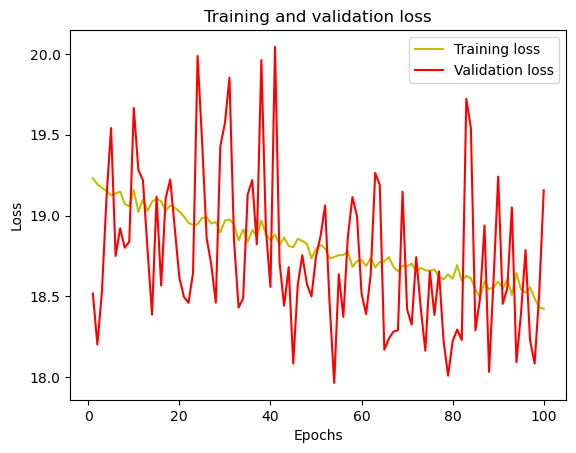

KeyError: 'mean_absolute_error'

In [50]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()